**Brian Blaylock**
*July 13, 2021*

# F1 Score Plot
This score shows the average of the evenly weighted precision and recall metric. See [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall#F-measure).

$$F1 = 2 \left( \frac{precision \times recall}{precision + recall} \right) $$

In [171]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6,6]

In [237]:
def f1_diagram(ax=None, **kwargs):
    """
    Related to precision and recall (success ratio and hit rate)
    Very similar to Critical Success Index (CSI)
    """
    if ax is None:
        ax = plt.gca()
        
    precision = np.arange(.01,1.01,.01)  # success ratio
    recall = np.arange(.01,1.01,.01)     # hit rate or probability of detection

    x, y = np.meshgrid(precision, recall)

    F1_score = 2*(x*y) / (x+y)
    
    kwargs.setdefault('levels', np.arange(0,1,.1))
    kwargs.setdefault('colors', '.8')
    kwargs.setdefault('zorder', 0)
        
    c = plt.contour(x, y, F1_score, **kwargs)
    c.clabel(manual=[(.8,.8), (.8, .5), (.8, .3), (.8, .1)], zorder=0)

    ax.set_title('F1 Score')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')

    ax.set_xticks(np.arange(0,1.1,.2))
    ax.set_yticks(np.arange(0,1.1,.2))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    return ax

def csi_diagram(ax=None, **kwargs):
    """
    Critical Success Index is related to POD and 1-FAR (Success Ratio SR).
    
    From Roebber 2009
    https://doi.org/10.1175/2008WAF2222159.1
    """
    if ax is None:
        ax = plt.gca()
    
    POD = np.arange(.01,1.01,.01)  # probability of detetion or hit rate
    SR = np.arange(.01,1.01,.01)   # 1-false alarm ratio (success ratio)

    x, y = np.meshgrid(POD, SR)

    csi_score = 1 / ((1/x)+(1/y)-1)
    
    kwargs.setdefault('levels', np.arange(0,1,.1))
    kwargs.setdefault('colors', '.8')
    kwargs.setdefault('zorder', 0)
    
    c = plt.contour(x, y, csi_score, **kwargs)
    c.clabel(
        manual=[(.8, i) for i in np.arange(.1,1,.2)],
        zorder=0)

    ax.set_title('Critical Success Index Curve')
    ax.set_xlabel('Success Ratio (1-FAR)')
    ax.set_ylabel('Probability of Detection (POD)')
    

    ax.set_xticks(np.arange(0,1.1,.2))
    ax.set_yticks(np.arange(0,1.1,.2))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    return ax

def bias_diagram(ax=None, **kwargs):
    """
    Bias is related to POD and 1-FAR (Success Ratio SR).
    
    From Roebber 2009
    https://doi.org/10.1175/2008WAF2222159.1
    """
    if ax is None:
        ax = plt.gca()
    
    POD = np.arange(.01,1.01,.01)  # probability of detetion or hit rate
    SR = np.arange(.01,1.01,.01)   # 1-false alarm ratio (success ratio)

    x, y = np.meshgrid(POD, SR)

    bias = np.transpose(x/y)
    
    kwargs.setdefault('levels', [.3, .5, .8, 1, 1.3, 1.5, 2, 3, 5, 10])
    kwargs.setdefault('colors', '.8')
    kwargs.setdefault('zorder', 0)
    kwargs.setdefault('linestyles', '--')
    
    cs = plt.contour(x, y, bias, **kwargs)
    #cs.clabel(
    #    #manual=[(.8, i) for i in np.arange(.1,1,.2)],
    #    zorder=0)
    labelAtEdge(kwargs['levels'], cs, ax, r'%.1f', side='top', pad=0.005, color=kwargs['colors'])
    levs = kwargs['levels'][:3]
    labelAtEdge(levs, cs, ax, r'%.1f', side='right', pad=0.005, color=kwargs['colors'])
    #labelAtEdge(kwargs['levels'], cs, ax, r'%.2f $C^{\circ}$', side='right', pad=0.005, color='r', fontsize=12)
    #labelAtEdge(kwargs['levels'], cs, ax, '%.2f', side='left', pad=0.005, color='r', fontsize=10)

    ax.set_title('Bias\n')
    ax.set_xlabel('Success Ratio (1-FAR)')
    ax.set_ylabel('Probability of Detection (POD)')
    

    ax.set_xticks(np.arange(0,1.1,.2))
    ax.set_yticks(np.arange(0,1.1,.2))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    return ax

def reliability_diagram(ax=None, **kwargs):
    """
    Related to Observed relative frequency and forecast probabilty
    See also: https://met.readthedocs.io/en/latest/Users_Guide/appendixC.html#reliability-diagram
    """
    if ax is None:
        ax = plt.gca()
    
    kwargs.setdefault('color', '.7')
    kwargs.setdefault('ls', '--')
    kwargs.setdefault('zorder', 0)
    
    plt.plot([0,1], [0,1])
    plt.text(.5, .54, 'perfect reliability', 
             fontsize=20,
             fontweight='bold',
             rotation=45,
             color=kwargs['color'],
             va='center', ha='center')
    
    ax.set_title('Reliability Diagram')
    ax.set_xlabel('Forecast Probability')
    ax.set_ylabel('Observed Relative Frequency')

    ax.set_xticks(np.arange(0,1.1,.2))
    ax.set_yticks(np.arange(0,1.1,.2))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    return ax

def labelAtEdge(levels, cs, ax, fmt, side='both', pad=0.005, **kwargs):
    '''Label contour lines at the edge of plot

    Solution from here:
    https://numbersmithy.com/how-to-label-the-contour-lines-at-the-edge-of-a-matplotlib-plot/

    Args:
        levels (1d array): contour levels.
        cs (QuadContourSet obj): the return value of contour() function.
        ax (Axes obj): matplotlib axis.
        fmt (str): formating string to format the label texts. E.g. '%.2f' for
            floating point values with 2 demical places.
    Keyword Args:
        side (str): on which side of the plot intersections of contour lines
            and plot boundary are checked. Could be: 'left', 'right', 'top',
            'bottom' or 'all'. E.g. 'left' means only intersections of contour
            lines and left plot boundary will be labeled. 'all' means all 4
            edges.
        pad (float): padding to add between plot edge and label text.
        **kwargs: additional keyword arguments to control texts. E.g. fontsize,
            color.
    '''

    from matplotlib.transforms import Bbox
    collections = cs.collections
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    bbox = Bbox.from_bounds(xlim[0], ylim[0], xlim[1]-xlim[0], ylim[1]-ylim[0])

    eps = 1e-5  # error for checking boundary intersection

    # -----------Loop through contour levels-----------
    for ii, lii in enumerate(levels):

        cii = collections[ii]  # contours for level lii
        pathsii = cii.get_paths()  # the Paths for these contours
        if len(pathsii) == 0:
            continue

        for pjj in pathsii:

            # check first whether the contour intersects the axis boundary
            if not pjj.intersects_bbox(bbox, False):  # False significant here
                continue

            xjj = pjj.vertices[:, 0]
            yjj = pjj.vertices[:, 1]

            # intersection with the left edge
            if side in ['left', 'all']:
                inter_idx = np.where(abs(xjj-xlim[0]) <= eps)[0]
                for kk in inter_idx:
                    inter_x = xjj[kk]
                    inter_y = yjj[kk]

                    ax.text(inter_x-pad, inter_y, fmt % lii,
                            ha='right',
                            va='center',
                            **kwargs)

            # intersection with the right edge
            if side in ['right', 'all']:
                inter_idx = np.where(abs(xjj-xlim[1]) <= eps)[0]
                for kk in inter_idx:
                    inter_x = xjj[kk]
                    inter_y = yjj[kk]

                    ax.text(inter_x+pad, inter_y, fmt % lii,
                            ha='left',
                            va='center',
                            **kwargs)

            # intersection with the bottom edge
            if side in ['bottom', 'all']:
                inter_idx = np.where(abs(yjj-ylim[0]) <= eps)[0]
                for kk in inter_idx:
                    inter_x = xjj[kk]
                    inter_y = yjj[kk]

                    ax.text(inter_x-pad, inter_y, fmt % lii,
                            ha='center',
                            va='top',
                            **kwargs)

            # intersection with the top edge
            if side in ['top', 'all']:
                inter_idx = np.where(abs(yjj-ylim[-1]) <= eps)[0]
                for kk in inter_idx:
                    inter_x = xjj[kk]
                    inter_y = yjj[kk]

                    ax.text(inter_x+pad, inter_y, fmt % lii,
                            ha='center',
                            va='bottom',
                            **kwargs)

    return

## F1 Score Example
For example, give two results with a precision and recall value, we could use the F1 metric to say that result 2 is better than result 1.

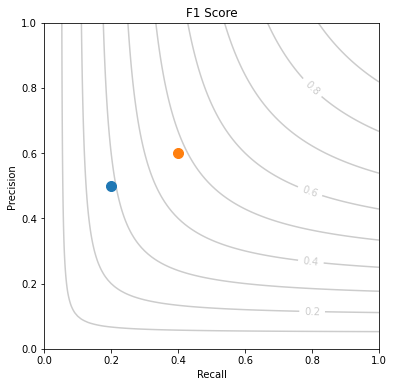

In [190]:
# For example:
ax = f1_diagram()

# First Result
ax.scatter(.2, .5, s=100)

# Second Result
ax.scatter(.4, .6, s=100)

# CSI Contour
Critical Success Index is very similar to F1 score

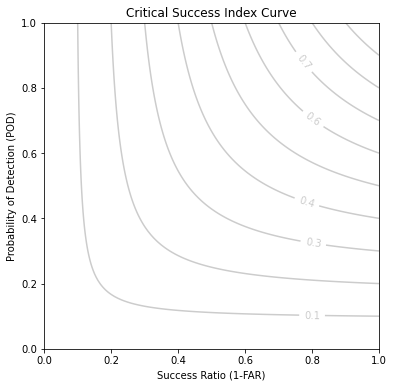

In [191]:
ax = csi_diagram()

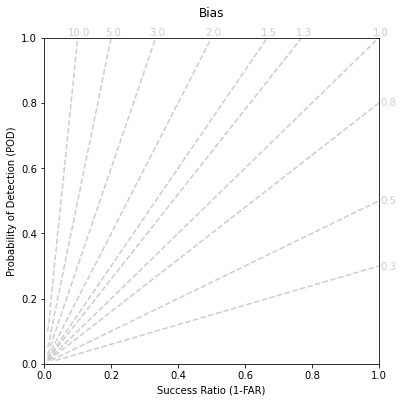

In [238]:
ax = bias_diagram()


<ipython-input-233-bda807308058>:87: RuntimeWarning: divide by zero encountered in true_divide
  bias = np.transpose(x/y)
<ipython-input-233-bda807308058>:87: RuntimeWarning: invalid value encountered in true_divide
  bias = np.transpose(x/y)


Text(0.5, 1.0, '')

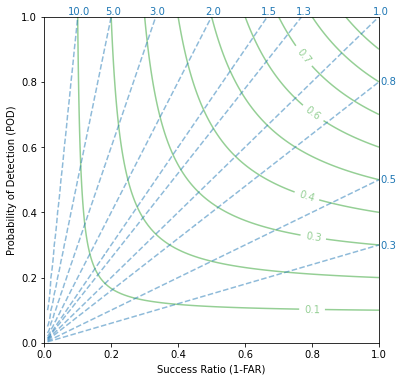

In [236]:
ax = csi_diagram(colors='tab:green', alpha=.5)
bias_diagram(ax=ax, colors='tab:blue', alpha=.5)
ax.set_title('')

## Reliability Diagram Example
Better forecasts are closer to the line, because the occur as frequently as they are predicted.
Points below the line indicate over-foreasting and forecast probabilits are too low when the points lie above the line.

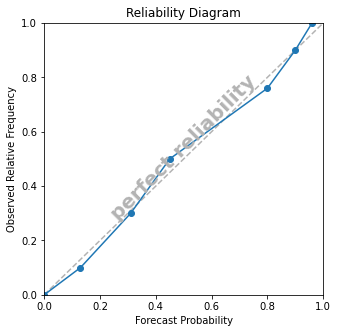

In [98]:
ax = reliability_diagram()

obs_prob = [0, .1, .3, .5, .76, .9, 1]
for_prob = [0, .13, .31, .45, .8, .9, .96]
ax.plot(for_prob, obs_prob, marker='o')

<AxesSubplot:title={'center':'Critical Success Index Curve'}, xlabel='Success Ratio (1-FAR)', ylabel='Probability of Detection (POD)'>

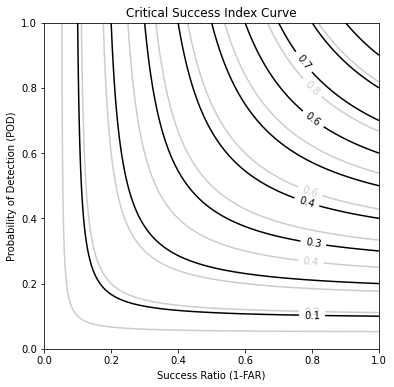

In [244]:
ax = f1_diagram()
csi_diagram(ax=ax, colors='k')